# Supervised Classification

## 1. Introduction

Supervised classification is a core technique in machine learning, used to predict categories or classes from previously labeled data. In the context of physical performance, this approach allows for the integrated analysis of multiple body and functional indicators, supporting the evaluation of individuals' performance levels.

This notebook explores a multi-class classification problem based on the Body Performance Data dataset. The work follows a structured methodology that includes exploratory data analysis, preparation and splitting of the dataset into training and testing sets, application of different classification algorithms, and evaluation of their performance using appropriate metrics. The main objective is to compare the models and analyze their generalization capability in predicting physical performance.

## 2. Importing Necessary Libraries

In this code block, the libraries used throughout the development of the work are imported. These libraries enable data manipulation and analysis, implementation of *Machine Learning* models, graphical visualization of results, and performance evaluation of the classifiers.

The ``pandas`` and ``numpy`` libraries are used for data handling and manipulation, allowing for efficient management of data structures. The ``matplotlib`` and ``seaborn`` libraries are used to create graphical representations, facilitating the interpretation of the obtained results.

Regarding *Machine Learning* methods, functionalities from ``scikit-learn`` are imported, specifically tools for splitting data into training and testing sets, attribute normalization, evaluation metrics, and classification algorithms. Among the models used, the *Decision Tree*, *Random Forest*, and *Neural Network (MLP)* stand out.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    RandomizedSearchCV
)

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from scipy.stats import randint, loguniform


## 3. Loading and Preparing the Dataset

In this code block, the previously prepared dataset is loaded using the ``read_csv`` function. The file used results from the *Exploratory Data Analysis (EDA)* and preprocessing performed earlier, ensuring that the data is ready for the modeling phase.

After loading the data, the independent variables (*features*) are separated from the dependent variable (*target*). The features correspond to all attributes of the dataset, while the target variable represents the class to be predicted.

This separation is essential for applying supervised classification algorithms, allowing for the proper training and evaluation of the models.


In [2]:
df = pd.read_csv("../data/processed/prepared_classification.csv")

X = df.drop("class", axis=1)
y = df["class"]


### 4. Exploratory Visualization of Features

In this code block, a **visual exploratory analysis** of the dataset is performed using a pairplot. For this purpose, the features are combined with the target variable (class), allowing for the simultaneous analysis of the relationship between pairs of variables and their individual distribution.

The pairplot presents a scatter plot for each pair of features, while the diagonals display the distributions of each variable in the form of histograms. Instances are differentiated by color according to the class they belong to, facilitating the observation of patterns, separations between classes, and potential overlaps.

This visualization allows for identifying relationships between variables, evaluating class separability, and detecting possible redundancies or correlations between features, constituting an important step in exploratory data analysis.


In [3]:
#df_vis = X.copy()
#df_vis["class"] = y

#sns.pairplot(
#    df_vis,
#    hue="class",
#    palette="Set2",
#    diag_kind="hist"
#)
#plt.show()

## 5. Splitting Data into Train and Test Sets

In this code block, the dataset is divided into **training and testing sets** using the ``train_test_split`` function. A ratio of 80% of the data for training and 20% for testing is used, a common practice in classification problems.

The ``random_state`` parameter is defined to guarantee the reproducibility of results, ensuring that the data split is consistent across different code executions.

Additionally, the ``stratify=y`` parameter is used, which ensures that the class distribution is maintained proportionally in both sets. This approach is particularly important in classification problems, as it contributes to a fairer and more reliable evaluation of model performance.


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 6. Data Normalization

In this code block, **data normalization** is applied using ``StandardScaler``. This technique transforms the attributes so that they have a mean of zero and a unit standard deviation, which is particularly relevant for algorithms sensitive to the scale of input variables.

The normalization process is fitted exclusively based on the training set using the ``fit_transform`` method to avoid data leakage. Subsequently, the same transformation is applied to the test set using the ``transform`` method, ensuring consistency between both sets.

This approach contributes to better model performance, especially in the case of algorithms like *Neural Networks*, where data scale has a significant impact on the learning process.


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Definition of Classification Models (Static Hyperparameters)

In this code block, the different **supervised classification models** used in the study are defined, allowing for a comparative analysis of their performance. Using multiple algorithms makes it possible to evaluate distinct Machine Learning approaches, including decision tree-based models, ensemble methods, and artificial neural networks.

The **Decision Tree Classifier** is configured with a limited maximum depth to control model complexity and reduce the risk of overfitting. This model also has the advantage of being easily interpretable, allowing the decision process to be understood.

The **Random Forest Classifier** consists of an ensemble method based on multiple decision trees, combining the individual predictions of each tree to obtain more robust and stable results. The number of trees and maximum depth are defined to balance model performance with the associated computational cost.

Finally, the **Multi-Layer Perceptron (MLP)** represents a Neural Network with multiple hidden layers. The use of the ReLU activation function and the Adam optimizer allows for efficient learning, especially in more complex classification problems. The maximum number of iterations is defined to ensure model convergence during the training process.

The *random_state* parameter is fixed in all models, ensuring the reproducibility of the obtained results.


In [6]:
models = {
    "Decision Tree": DecisionTreeClassifier(
        max_depth=10,
        random_state=42
    ),
    
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        random_state=42
    ),
    
    "Neural Net": MLPClassifier(
        hidden_layer_sizes=(100, 50),
        activation="relu",
        solver="adam",
        max_iter=500,
        random_state=42
    )
}


## 8. Model Training, Prediction, and Evaluation

In this code block, model training is performed, followed by **generating predictions** and **evaluating performance**. This process is carried out iteratively for each of the previously defined models, allowing for a systematic and consistent comparison of the obtained results.

In the case of the **Artificial Neural Network (MLP)** model, the previously normalized data is used, as this type of algorithm is particularly sensitive to attribute scaling. In contrast, decision tree-based models (Decision Tree and Random Forest) are trained and evaluated using non-normalized data, as they do not depend on the scale of input variables.

After training each model, predictions are generated on the test set. Next, the accuracy metric is calculated and stored for later comparative analysis between the different models.

Additionally, the **classification report** is presented, which includes metrics such as precision, recall, and F1-score for each class. This report allows for a more detailed evaluation of model performance, contributing to a deeper analysis of their behavior.


In [7]:
results = {}

for name, model in models.items():
    
    if name == "Neural Net":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    
    print(f"\n {name}")
    print(classification_report(y_test, y_pred))



 Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.85      0.75       670
           1       0.53      0.60      0.56       669
           2       0.73      0.56      0.63       670
           3       0.90      0.76      0.82       670

    accuracy                           0.69      2679
   macro avg       0.71      0.69      0.69      2679
weighted avg       0.71      0.69      0.69      2679


 Random Forest
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       670
           1       0.64      0.56      0.60       669
           2       0.73      0.71      0.72       670
           3       0.91      0.83      0.87       670

    accuracy                           0.75      2679
   macro avg       0.75      0.75      0.74      2679
weighted avg       0.75      0.75      0.74      2679


 Neural Net
              precision    recall  f1-score   support

           0       0.73      0

## 9. Analysis of Confusion Matrices

The confusion matrix provides a detailed view of the results obtained by the classifiers, highlighting true positives, true negatives, false positives, and false negatives. This representation allows analyzing the correspondence between real classes and predicted classes for each of the considered models.

By visualizing confusion matrices in the form of heatmaps, it becomes possible to identify error patterns, evaluate which classes are most frequently confused, and understand the models' behavior more deeply. This analysis complements the quantitative metrics presented earlier, contributing to a more complete assessment of classifier performance.


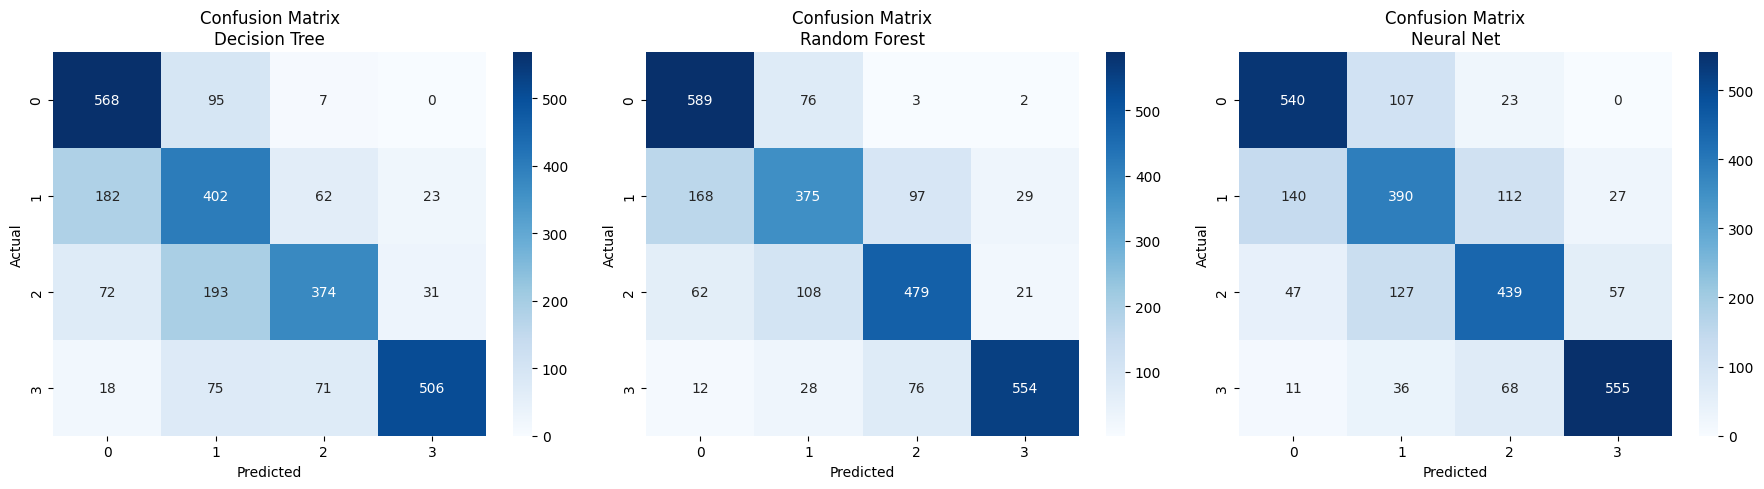

In [8]:
plt.figure(figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    
    plt.subplot(1, 3, i + 1)
    
    if name == "Neural Net":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues"
    )
    
    plt.title(f"Confusion Matrix\n{name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

## 10. Model Performance Comparison

In this code block, a **graphical comparison of classification** model performance is performed using the **accuracy** metric. The previously calculated performance values are represented via a bar chart, allowing for a direct visual analysis of the differences between the considered models.

This graphical representation makes it possible to immediately identify the model with the best overall performance, complementing the quantitative analysis performed earlier and contributing to a better-grounded discussion of the obtained results.


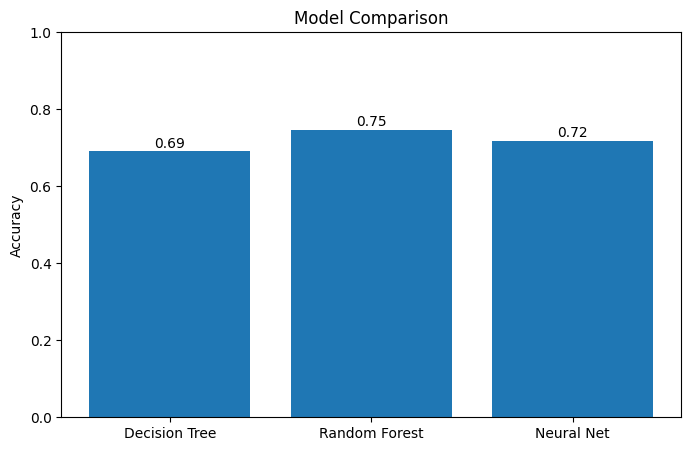

In [9]:
plt.figure(figsize=(8, 5))

plt.bar(
    results.keys(),
    results.values()
)

plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Comparison")

for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center")

plt.show()

## 11. Cross-Validation

In this code block, the **model performance evaluation** is carried out using the Stratified K-Fold technique. This approach allows for a more robust and reliable estimate of model performance, reducing dependency on a single data split into training and testing sets.

Cross-Validation is configured with five partitions (folds), with controlled data randomization applied to guarantee result reproducibility. The use of a stratified strategy ensures that the class distribution remains proportional in each fold, which is particularly important in classification problems.

The **Random Forest** classifier is evaluated using the **accuracy** metric. Finally, the mean and standard deviation of the accuracies obtained across the different folds are presented, providing a measure of the model's average performance and its stability across different partitions.


In [10]:
cv = StratifiedKFold(n_splits=5, shuffle=False)

scores = cross_val_score(
    RandomForestClassifier(random_state=42),
    X,
    y,
    cv=cv,
    scoring="accuracy"
)

print("CV Accuracy:", scores.mean(), "+/-", scores.std())


CV Accuracy: 0.7362800761935347 +/- 0.005759773589004821


## 12. Distribution of Most Relevant Features

Based on the feature importance obtained from the **Random Forest** model defined earlier, we proceed to analyze the distribution of the most influential variables in the classification process. Analyzing feature importance allows identifying which attributes contribute most to the model's decisions.

In this code block, the previously trained **Random Forest** model with manually defined hyperparameters is used. Before calculating feature importance, it is ensured that the model is properly fitted to the training data.

Variable importances are calculated and sorted in descending order, selecting the three most relevant features. For these variables, histograms are generated to analyze their distribution across the dataset.

This visualization contributes to a better understanding of the impact of the most relevant features on the classification process and a deeper interpretation of the model's behavior, complementing the quantitative performance analysis presented earlier.


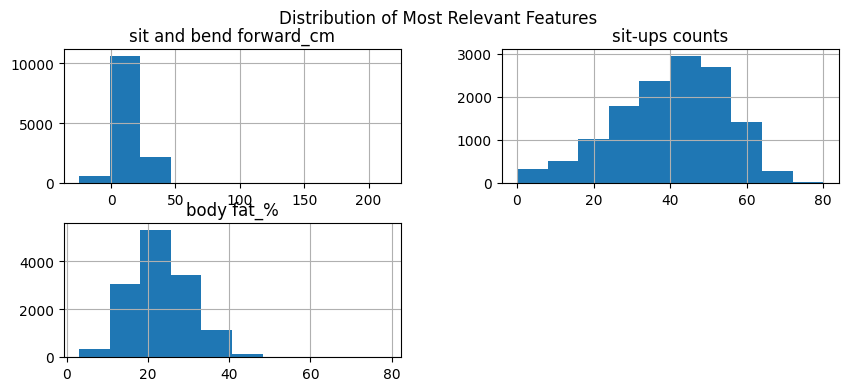

In [11]:
# Use of the Random Forest model defined earlier
rf_estimator = models["Random Forest"]

# Ensure the model is trained before accessing feature importances
if not hasattr(rf_estimator, "feature_importances_"):
    rf_estimator.fit(X_train, y_train)

# Calculation of feature importance
fi = pd.Series(
    rf_estimator.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Selection of the three most relevant features
top_features = fi.head(3).index

# Visualization of the distribution of the most relevant features
df[top_features].hist(figsize=(10, 4))
plt.suptitle("Distribution of Most Relevant Features")
plt.show()

## 13. Hyperparameter Optimization with RandomizedSearchCV

In this code block, **automatic hyperparameter optimization** of the previously considered classification models is performed using the ``RandomizedSearchCV`` method. This approach allows improving model performance by selecting the most suitable hyperparameter combinations based on cross-validation.

Unlike an exhaustive search (Grid Search), ``RandomizedSearchCV`` randomly selects a set of hyperparameter combinations from previously defined distributions or lists. This strategy has the advantage of reducing computational cost while maintaining an efficient exploration of the parameter space.

Optimization is performed using cross-validation with five partitions (folds) and the accuracy metric, ensuring a consistent and reliable evaluation of the performance of each tested configuration.


### 13.1 Hyperparameter Optimization – Decision Tree

In this code block, hyperparameter optimization is applied to the **Decision Tree Classifier** model. Different values are considered for fundamental parameters, such as the maximum tree depth, the minimum number of samples required to split a node, and the minimum number of samples per leaf.

Varying these hyperparameters allows controlling model complexity, directly influencing the balance between bias and variance. Using cross-validation ensures that the selection of the best configuration does not depend on a single data split, contributing to greater model generalization capacity.

At the end of the process, the hyperparameters that led to the best average performance in cross-validation are presented, along with the corresponding *accuracy* value.


In [12]:
dt_param_dist = {
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)

dt_search = RandomizedSearchCV(
    dt,
    param_distributions=dt_param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42
)

dt_search.fit(X_train, y_train)

print("Decision Tree best params:", dt_search.best_params_)
print("Decision Tree best CV score:", dt_search.best_score_)

Decision Tree best params: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Decision Tree best CV score: 0.6783634467941788


### 13.2 Hyperparameter Optimization – Random Forest

In this code block, hyperparameter optimization is performed for the **Random Forest Classifier** model, an ensemble method based on multiple decision trees. Different values are explored for the number of trees, maximum depth, minimum number of samples per leaf, and maximum number of features considered in each split.

Varying these parameters allows adjusting the robustness and generalization capacity of the model, as well as controlling the risk of overfitting. Using ``RandomizedSearchCV`` makes it possible to evaluate different combinations efficiently, maintaining an appropriate compromise between performance and computational cost.

As in the previous case, performance is evaluated using stratified cross-validation, presenting the best hyperparameters found and the respective average accuracy at the end.


In [13]:
rf_param_dist = {
    "n_estimators": [200, 400, 600],
    "max_depth": [None, 10, 20, 30],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    rf,
    param_distributions=rf_param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_train, y_train)

print("Random Forest best params:", rf_search.best_params_)
print("Random Forest best CV score:", rf_search.best_score_)

Random Forest best params: {'n_estimators': 600, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Random Forest best CV score: 0.7296049108708658


### 13.3 Hyperparameter Optimization – Neural Network (MLP)

In this code block, hyperparameter optimization is applied to the **Multi-Layer Perceptron (Neural Network)**. Different values are considered for the network architecture, namely the number and size of hidden layers, the activation function, the regularization rate (*alpha*), and the learning rate strategy.

Optimizing these hyperparameters is particularly relevant in the context of neural networks, as these models are sensitive to architecture configuration and the regularization mechanisms used. The use of previously normalized data ensures suitable conditions for the learning process.

``RandomizedSearchCV`` allows evaluating various configurations systematically, using cross-validation to select the combination that presents the best average performance in terms of accuracy.


In [14]:
mlp_param_dist = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50), (50, 50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "adaptive"]
}

mlp = MLPClassifier(
    solver="adam",
    max_iter=500,
    random_state=42
)

mlp_search = RandomizedSearchCV(
    mlp,
    param_distributions=mlp_param_dist,
    n_iter=20,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)


mlp_search.fit(X_train_scaled, y_train)

print("MLP best params:", mlp_search.best_params_)
print("MLP best CV score:", mlp_search.best_score_)

MLP best params: {'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'relu'}
MLP best CV score: 0.7393124118522818


## 14. Analysis of Optimization Results

After completing the hyperparameter optimization process, the best parameters obtained for each model are analyzed, as well as their respective cross-validation performance values.

This analysis allows comparing the models with optimized hyperparameters against the previously defined versions with static configurations, evaluating the impact of automatic optimization on classifier performance. Generally, this process contributes to obtaining more robust models with better generalization capacity to unseen data.

In [15]:
print("\nStatic vs Dynamic Comparison")

print(f"Decision Tree static: {results['Decision Tree']:.3f}")
print(f"Decision Tree dynamic (CV): {dt_search.best_score_:.3f}")

print(f"Random Forest static: {results['Random Forest']:.3f}")
print(f"Random Forest dynamic (CV): {rf_search.best_score_:.3f}")

print(f"Neural Net static: {results['Neural Net']:.3f}")
print(f"Neural Net dynamic (CV): {mlp_search.best_score_:.3f}")


Static vs Dynamic Comparison
Decision Tree static: 0.691
Decision Tree dynamic (CV): 0.678
Random Forest static: 0.745
Random Forest dynamic (CV): 0.730
Neural Net static: 0.718
Neural Net dynamic (CV): 0.739


## 15. Conclusion

In this work, different supervised classification algorithms were applied, namely Decision Tree, Random Forest, and Neural Network (MLP), with the aim of comparing models with different levels of complexity and generalization capacity. The results obtained demonstrated that the choice of algorithm directly influences prediction performance.

The Decision Tree proved to be simpler and more interpretable, but more prone to overfitting. The Random Forest presented a more stable and robust performance, benefiting from the combination of multiple trees. The MLP showed the capacity to model more complex relationships, although with greater sensitivity to the configuration of its parameters.

It was also verified that the proper definition of hyperparameters has a significant impact on model performance. In this context, well-adjusted static configurations presented more consistent results than dynamic approaches (depending on the search range).

The use of cross-validation was fundamental for a more reliable evaluation, allowing for reduced risk of overfitting and obtaining more realistic performance estimates. In summary, this work demonstrates that the choice of algorithm, combined with correct parameter configuration and proper evaluation, is essential for the development of effective classification models applied to physical performance prediction.